<a href="https://colab.research.google.com/github/abdullahridwan/Machine-Learning/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Table of Contents
1.  [Setup](#setup)
2.  [Exploring the Data](#eda)
3.  [Text Preprocessing](#textpre)
    - [A. Walk through](#wt)
    - [B. Text PreProcessing Function](#tppf)



NB - the main step is the creation of the pipeline, but the steps beforehand was for the sake of learning what's actually going on in these piplines!

#1. Setup <a name="setup"></a>
*bringing in nltk and the stopwords package. 
*bringing in the sms spam collection file from uci's dataset and putting it into a data frame

In [ ]:
import nltk

In [ ]:
#nltk.download_shell()

In [ ]:
#uci sms spam collection dataset ; ham is normal message
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection (1)


In [ ]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [ ]:
print(len(messages))

5574


In [ ]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
for mess_no, message in enumerate(messages[:10]):
  print(mess_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [ ]:
import pandas as pd

In [ ]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names=['label', 'message'])

In [ ]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

# 2. Exploring the Data <a name="eda"></a>

In [ ]:
messages['length'] = messages['message'].apply(len)

In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

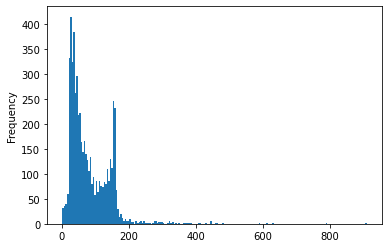

In [ ]:
messages['length'].plot.hist(bins=200)

In [ ]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
#looking at outlier for message lengths
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f538ac5b7f0>,
      dtype=object)

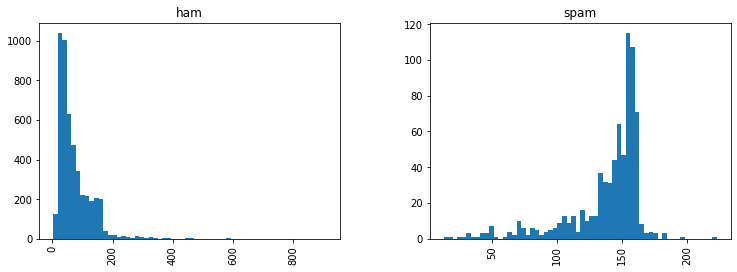

In [ ]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

We see that ham messages usually have a lower text length than spam messages. Hence, we can use text length as a viable feature to differentiate between the two. 

# 3.Text preprocessing <a name="textpre"></a>
* we want to use our classification algos on the text, but our data needs some sort of numerical features in order to preform said tasks. 
* Hence, we want to make our strings into a vector and thus numerical format. Common way to do so is to use a bag of words. 




## A. Walk through of what we'll be doing <a name="wt"></a>

In [ ]:
#remove punctuations
#remove common words/ stop words. 
  #Hence the reason we downloaded the stopwords library from nltk 

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
#so heres an example of what we'll do 
s = "Hello! My name is Abdullah!"

In [ ]:
#get rid of the punctuations
no_punct_lst = [c for c in s if c not in string.punctuation]
no_punct_s = "".join(no_punct_lst)
no_punct_s

'Hello My name is Abdullah'

In [ ]:
#not get rid of the stopwords. Here we use the downloaded nltk package
no_punct_s.split()

['Hello', 'My', 'name', 'is', 'Abdullah']

In [ ]:
clean_lst = [word for word in no_punct_s.split() if word.lower() not in stopwords.words('english')]
clean_lst

['Hello', 'name', 'Abdullah']

## B. Text Preprocessing Function <a name="tppf"></a>
So, knowing what we want to do above, let's make this into a function and apply it to the dataframe 

In [ ]:
def text_pre_process(message):
  #take out the punctuations
  npl = [c for c in message if c not in string.punctuation]
  nps = "".join(npl)

  #take out the stop words
  text_lst = nps.split()
  clean_lst = [word for word in text_lst if word.lower() not in stopwords.words('english')]

  #return a list of clean words
  return clean_lst

In [ ]:
s = "Hello Herb! My name is Herb!!"
text_pre_process(s)

['Hello', 'Herb', 'name', 'Herb']

In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
messages['message'].head(5).apply(text_pre_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

#4. Vectorization


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Count Vectorizer tokenzies text and builds a vocabulary of the known words
bow_transformer = CountVectorizer(analyzer=text_pre_process).fit(messages['message'])

In [ ]:
print(bow_transformer)

CountVectorizer(analyzer=<function text_pre_process at 0x7f538ab07d08>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


### Example

In [ ]:
#how many words
print(len(bow_transformer.vocabulary_))

11425


In [ ]:
#so what does this mean? So here is our second message. 
sec_mess = messages['message'][1]
print(first_mess)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [ ]:
#And we transform it into a vector with the shape below. 
bow4 = bow_transformer.transform([sec_mess])
print(bow4.shape)

(1, 11425)


In [ ]:
# where the second message has 6 unique words. 
print(bow4)

  (0, 2451)	1
  (0, 3064)	1
  (0, 7701)	1
  (0, 8590)	1
  (0, 10698)	1
  (0, 11072)	1


### Back to original

In [ ]:
#sparse matrix of the bag of words model 
messages_bow = bow_transformer.transform(messages['message'])

In [ ]:
# term frequency and inverse document frequency 
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)

In [ ]:
#weight value given to each of those words
print(tfidf4)

  (0, 11072)	0.40061560982443056
  (0, 10698)	0.2063637481323008
  (0, 8590)	0.5043405901305854
  (0, 7701)	0.3767401070812794
  (0, 3064)	0.2911995411244838
  (0, 2451)	0.561988811929381


In [ ]:
#make entire bow corpus into tfid corpous and transforms the messages into numerical vectors
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [ ]:
#now that the messages are finally numerical vectors, we can use a classifier. 
# the Naive Bayes classifier s a good choice 
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [ ]:
#what the naive bayes model classified the message as
spam_detect_model.predict(tfidf4)[0]

'ham'

In [ ]:
#what is actually is
messages.label[3]

'ham'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3 )

In [ ]:
#sklearn pipeline!
from sklearn.pipeline import Pipeline

In [ ]:
#pipline takes in a list of steps you want to do represented as tuples.
# (name of step, what you actually want to do)
pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer=text_pre_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
])

In [ ]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_pre_process at 0x7f538ab07d08>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1450
        spam       1.00      0.72      0.84       222

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



### Using Random Forest classifier instead of Naive Bayes

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline_rf = Pipeline([
                     ('bow', CountVectorizer(analyzer=text_pre_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', RandomForestClassifier())
])

In [ ]:
pipeline_rf.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_pre_process at 0x7f538ab07d08>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [ ]:
predictions_rf = pipeline_rf.predict(msg_test)

In [ ]:
print(classification_report(label_test, predictions_rf))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1450
        spam       1.00      0.81      0.89       222

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672

